In [34]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_results_list = []
results_dir = 'results-structure'

In [35]:
df_results_list = []

for file in os.listdir(results_dir):
    df_loc = pd.read_csv(os.path.join(results_dir, file))
    df_results_list.append(df_loc)
big_perf_df = pd.concat(df_results_list)
big_perf_df

,algo,score,metric,type,split,n_var,n_samples,idx_features_used_binary_code,structure,gap_E0_E1,proportion_of_ones
0,DT,0.990500,accuracy,test,77,3,10000,53,conjunction1,0.25,0.9
1,DT,0.989875,accuracy,train,77,3,10000,53,conjunction1,0.25,0.9
2,DT,0.000000,01 loss,causal,77,3,10000,53,conjunction1,0.25,0.9
3,DT,0.003103,t2-t1,fit time,77,3,10000,53,conjunction1,0.25,0.9
0,ICP+DT,0.976750,accuracy,test,44,3,10000,112,conjunction3,0.25,0.9
...,...,...,...,...,...,...,...,...,...,...,...
3,ICSCM,1.027364,t2-t1,fit time,2,3,10000,240,disjunction4,0.25,0.3
0,SCM,0.987750,accuracy,test,82,3,10000,256,disjunction4,0.25,0.3
1,SCM,0.986625,accuracy,train,82,3,10000,256,disjunction4,0.25,0.3
2,SCM,0.000000,01 loss,causal,82,3,10000,256,disjunction4,0.25,0.3


In [36]:
big_perf_df['algo'].unique()

array(['DT', 'ICP+DT', 'SCM', 'ICSCM'], dtype=object)

In [37]:
big_perf_df['structure'].unique()

array(['conjunction1', 'conjunction3', 'disjunction3', 'conjunction2',
       'conjunction4', 'disjunction2', 'disjunction1', 'disjunction4',
       'treecomplete7', 'treecomplete3'], dtype=object)

In [38]:


n_samples_of_plot = 10000
big_perf_df = big_perf_df[big_perf_df['n_samples'] == n_samples_of_plot]
big_perf_df = big_perf_df[big_perf_df['n_var'] == 3]


big_perf_df['algo'].replace({'ICP+DT': 'ICP'}, inplace=True)
algos_to_keep = [
                'SCM', 
                'DT', 
                'ICP', 
                'ICSCM'
                ]

big_perf_df['structure'].replace({'disjunction1': 'Single rule'}, inplace=True)
for structure in big_perf_df['structure'].unique():
    if structure == 'Single rule':
        continue
    structure_type = structure[:-1]
    # capitalize first letter
    structure_type = structure_type[0].upper() + structure_type[1:]
    structure_size = structure[-1]
    new_name = f'{structure_type} of {structure_size} rules'
    big_perf_df['structure'].replace({structure: new_name}, inplace=True)
structures_to_keep = [
                'Single rule', 
                'Conjunction of 2 rules',
                'Conjunction of 3 rules',
                'Conjunction of 4 rules',
                'Disjunction of 2 rules',
                'Disjunction of 3 rules',
                'Disjunction of 4 rules',
                 ]


big_perf_df = big_perf_df[big_perf_df['algo'].isin(algos_to_keep)]
x_order = sorted(list(set(big_perf_df['structure'])))

perf_df_causalscore = big_perf_df[big_perf_df['type'] == 'causal']

n_split_required = 100

for a in set(perf_df_causalscore['algo']):
    perf_df_causalscore_a = perf_df_causalscore[perf_df_causalscore['algo'] == a]
    for s in set(perf_df_causalscore['structure']):
        perf_df_causalscore_a_n = perf_df_causalscore_a[perf_df_causalscore_a['structure'] == s]
        splits = set(perf_df_causalscore_a_n['split'])
        if len(splits) < n_split_required:
            print(f'Warning: {a, s} has only {len(splits)} splits')
            # remove the rows
            perf_df_causalscore = perf_df_causalscore[~((perf_df_causalscore['algo'] == a) & (perf_df_causalscore['structure'] == s))]
perf_df_causalscore = perf_df_causalscore[perf_df_causalscore['split'].isin(list(range(n_split_required)))]



/tmp/ipykernel_16975/1980743754.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_perf_df['algo'].replace({'ICP+DT': 'ICP'}, inplace=True)
/tmp/ipykernel_16975/1980743754.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [39]:
#structure_values = perf_df_causalscore['structure'].unique().tolist()
#structure_values.sort()
#print(structure_values)
#structure_values_part1 = [s for s in structure_values if 'continuous' not in s]
#structure_values_part2 = [s for s in structure_values if 'continuous' in s]
#structure_values_part1.sort()
#structure_values_part2.sort()
#structure_values = structure_values_part1 + structure_values_part2
structure_values = structures_to_keep

#algos_values = perf_df_causalscore_tree['algo'].unique().tolist()
#algos_values.sort()
algos_values = algos_to_keep
print(algos_values)

['SCM', 'DT', 'ICP', 'ICSCM']


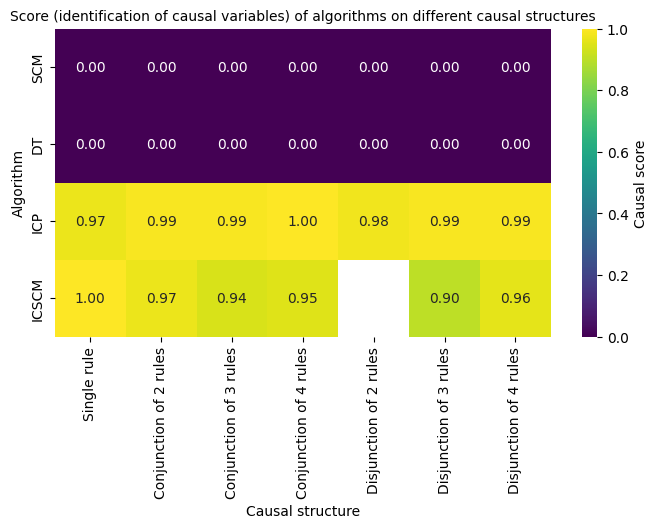

In [40]:
heatmap_df = perf_df_causalscore.pivot_table(index='algo', columns='structure', values='score', aggfunc='mean')
heatmap_df = heatmap_df.reindex(index=algos_values, columns=structure_values)

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'Causal score'})
plt.title('Score (identification of causal variables) of algorithms on different causal structures', fontsize=10)
plt.xlabel('Causal structure', fontsize=10)
plt.ylabel('Algorithm', fontsize=10)
plt.show()